# Generating outliers in tabular data

This tutorial shows how to generate outliers (extreme values) by generating data points with a z-score greater than 3.

In [1]:
from badgers.transforms.tabular_data.outliers import ZScoreTransformer, HypersphereSamplingTransformer, PCATransformer, KernelPCATransformer, DecompositionZScoreTransformer, DecompositionHypersphereSamplingTransformer
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np

In [2]:
def plot_outliers(X, Xt, labels, transformed_labels, feature_names):
    """
    Some utility function to generate the plots
    """
    fig, axes = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(8,4))
    # plot original data
    for i, l in enumerate(np.unique(labels)):
        ix = np.where(labels == l)
        axes[0].scatter(X[ix,0],X[ix,1], c = f'C{i}', label = l)
    # plot transformed data
    for i, l in enumerate(np.unique(labels)):
        ix = np.where(transformed_labels == l)
        axes[1].scatter(Xt[ix,0],Xt[ix,1],c = f'C{i}', label = l)
    # add transformed outliers
    ix = np.where(transformed_labels == 'outliers')
    axes[1].scatter(Xt[ix,0],Xt[ix,1], marker = 'x', c = f'black', label = 'outliers')
    # titles and co
    axes[0].set_title('Original')
    axes[1].set_title('Transformed')
    axes[0].set_xlabel(feature_names[0], fontsize=10)
    axes[1].set_xlabel(feature_names[0], fontsize=10)
    axes[0].set_ylabel(feature_names[1], fontsize=10)
    axes[1].set_ylabel(feature_names[1], fontsize=10)
    axes[1].legend(ncol=1, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    return fig, axes


## Load and prepare data

We first load an existing dataset from `sklearn.datasets`

In [3]:
data = load_iris()

X = data['data']
y = data['target']
labels = np.array([data['target_names'][i] for i in y])

## Generate outliers using a simple z-score transformer

The transformer generates data points with a z-score greater than 3 for each dimension

In [9]:
trf = ZScoreTransformer(percentage_outliers=25)
Xt = trf.transform(X.copy())
transformed_labels = np.array([l for l in labels] + ['outliers'] * len(trf.outliers_indices_))

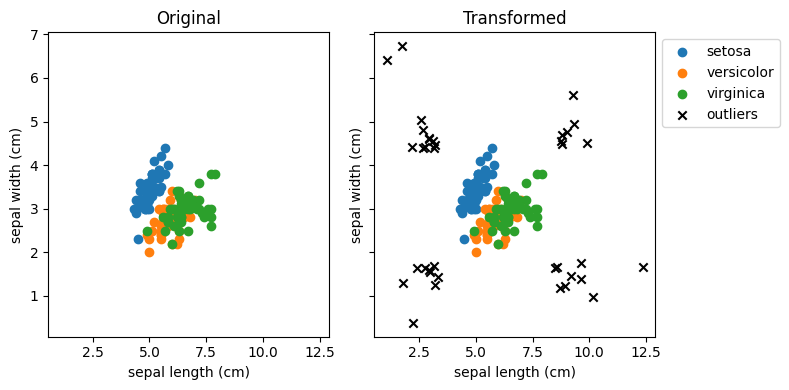

In [11]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])

## Generate outliers by first reducing the dimensions and then apply the z-score transformer

### Using PCATransformer

In [ ]:
trf = PCATransformer(percentage_outliers=5, n_components=2)
Xt = trf.transform(X.copy())
transformed_labels = labels.copy()
transformed_labels[trf.outliers_indices_] = 'outliers'

In [ ]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])

### Using KernelPCATransformer

In [ ]:
trf = KernelPCATransformer(percentage_outliers=5, n_components=2)
Xt = trf.transform(X.copy())
transformed_labels = labels.copy()
transformed_labels[trf.outliers_indices_] = 'outliers'

In [ ]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])

### Using other dimension reduction techniques from sklearn

In [ ]:
from sklearn.decomposition import FastICA

In [ ]:
trf = DecompositionZScoreTransformer(
    percentage_outliers = 10, 
    n_components = 2, 
    decomposition_transformer_class = FastICA, 
    whiten='unit-variance'
)
Xt = trf.transform(X.copy())
transformed_labels = labels.copy()
transformed_labels[trf.outliers_indices_] = 'outliers'

In [ ]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])

## Generate outliers using a simple hypersphere sampling transformer

The transformer generates data points on a hypersphere of radius greater than 3 sigmas

In [ ]:
trf = HypersphereSamplingTransformer(percentage_outliers=25)
Xt = trf.transform(X.copy())
transformed_labels = labels.copy()
transformed_labels[trf.outliers_indices_] = 'outliers'

In [ ]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])

### Using hypersphere sampling with dimension reduction techniques

In [ ]:
trf = DecompositionHypersphereSamplingTransformer(
    percentage_outliers = 10, 
    n_components = 2, 
    decomposition_transformer_class = FastICA, 
    whiten='unit-variance'
)
Xt = trf.transform(X.copy())
transformed_labels = labels.copy()
transformed_labels[trf.outliers_indices_] = 'outliers'

In [ ]:
fig, axes = plot_outliers(X, Xt, labels, transformed_labels, data['feature_names'])